<a href="https://colab.research.google.com/github/deondmello16/deepFake/blob/main/DeepFake1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
!pip install mtcnn
from mtcnn import MTCNN
import threading as thr
 
#!cd /kaggle/working/
!mkdir frames_1
!mkdir frames_2
!mkdir frames_3
!mkdir frames_4
!mkdir results_1
!mkdir results_2
!mkdir presidents

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 51.3 MB/s eta 0:00:00


In [2]:
input_1 = 'presidents/trump1.mp4'
input_2 = 'presidents/trump2.mp4'
input_3 = 'presidents/biden1.mp4'
input_4 = 'presidents/biden2.mp4'
output_1 = 'frames_1/'
output_2 = 'frames_2/'
output_3 = 'frames_3/'
output_4 = 'frames_4/'

In [3]:
def extract_frames(input_path,output_path):
    videocapture = cv2.VideoCapture(input_path)
    success,image = videocapture.read()
    count = 0
    while success:
        cv2.imwrite(output_path+"frame%d.jpg" % count, image)     
        success,image = videocapture.read()
        count += 1
    return count

In [4]:
total_frames_1 = extract_frames(input_1,output_1)
total_frames_2 = extract_frames(input_2,output_2)
total_frames_3 = extract_frames(input_3,output_3)
total_frames_4 = extract_frames(input_4,output_4)

In [5]:
print('Total frames extracted in video 1: ',total_frames_1)
print('Total frames extracted in video 2: ',total_frames_2)
print('Total frames extracted in video 3: ',total_frames_3)
print('Total frames extracted in video 4: ',total_frames_4)

Total frames extracted in video 1:  327
Total frames extracted in video 2:  329
Total frames extracted in video 3:  301
Total frames extracted in video 4:  328


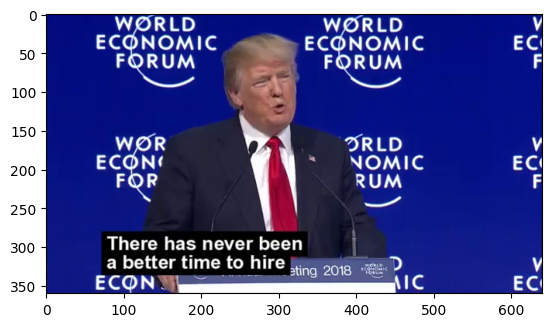

In [6]:
%matplotlib inline
plt.figure()
image = cv2.imread('frames_1/frame1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = image.astype('float32')
image /= 255.0
plt.imshow(image)
plt.show()

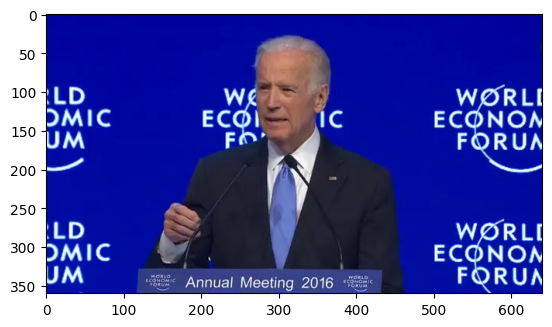

In [7]:
%matplotlib inline
plt.figure()
image = cv2.imread('frames_3/frame1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [8]:
def extract_faces(source_1,source_2,destination,detector):
    global counter
    counter = 0
    def src1(source_1,destination,detector):
      counter = 0
      for dirname, _, filenames in os.walk(source_1):
          for filename in filenames:
              try:
                  image = cv2.imread(os.path.join(dirname, filename))
                  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                  detections = detector.detect_faces(image)
                  x, y, width, height = detections[0]['box']
                  x1,y1,x2,y2 = x-10,y+10,x-10 +width + 20,y+10+height
                  face = image[y1:y2, x1:x2]
                  face = cv2.resize(face, (120, 120), interpolation=cv2.INTER_LINEAR)
                  plt.imsave(os.path.join(destination,str(counter)+'.jpg'),face)
                  # print('Saved: ',os.path.join(destination,str(counter)+'.jpg'))
              except:
                  pass
              counter += 2
    def src2(source_2,destination,detector):
      counter = 0
      for dirname, _, filenames in os.walk(source_2):
          for filename in filenames:
              try:
                  image = cv2.imread(os.path.join(dirname, filename))
                  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                  detections = detector.detect_faces(image)
                  x, y, width, height = detections[0]['box']
                  x1,y1,x2,y2 = x-10,y+10,x-10 +width + 20,y+10+height
                  face = image[y1:y2, x1:x2]
                  face = cv2.resize(face, (120, 120), interpolation=cv2.INTER_LINEAR)
                  plt.imsave(os.path.join(destination,str(counter)+'.jpg'),face)
                  # print('Saved: ',os.path.join(destination,str(counter)+'.jpg'))
              except:
                  pass
              counter += 1
    t1 = thr.Thread(target=src1,args=(source_1,destination,detector))
    t2 = thr.Thread(target=src2,args=(source_2,destination,detector))

    t1.start()
    t2.start()

    t1.join()
    t2.join()

detector = MTCNN()
t1 = thr.Thread(target=extract_faces,args=('frames_1/','frames_2/', 'results_1/',detector))
t2 = thr.Thread(target=extract_faces,args=('frames_3/','frames_4/', 'results_2/',detector))

t1.start()
t2.start()

t1.join()
t2.join()

# extract_faces('frames_1/','frames_2/', 'results_1/',detector)
# extract_faces('frames_3/','frames_4/', 'results_2/',detector)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 53ms/step


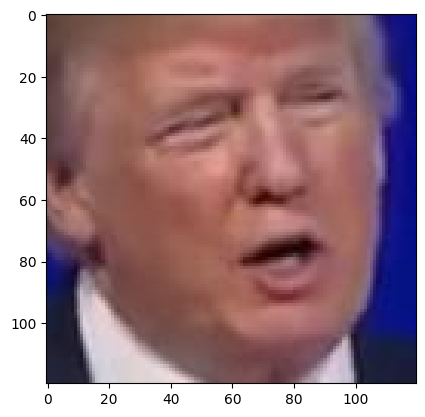

In [12]:
%matplotlib inline
plt.figure()
image = cv2.imread('results_1/70.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [10]:
!zip -r trump_faces.zip results_1/
!zip -r biden_faces.zip results_2/

  adding: results_1/ (stored 0%)
  adding: results_1/652.jpg (deflated 6%)
  adding: results_1/576.jpg (deflated 6%)
  adding: results_1/4.jpg (deflated 6%)
  adding: results_1/460.jpg (deflated 5%)
  adding: results_1/474.jpg (deflated 5%)
  adding: results_1/27.jpg (deflated 5%)
  adding: results_1/404.jpg (deflated 5%)
  adding: results_1/175.jpg (deflated 6%)
  adding: results_1/206.jpg (deflated 6%)
  adding: results_1/45.jpg (deflated 6%)
  adding: results_1/13.jpg (deflated 6%)
  adding: results_1/166.jpg (deflated 5%)
  adding: results_1/62.jpg (deflated 5%)
  adding: results_1/296.jpg (deflated 5%)
  adding: results_1/20.jpg (deflated 5%)
  adding: results_1/418.jpg (deflated 6%)
  adding: results_1/234.jpg (deflated 5%)
  adding: results_1/46.jpg (deflated 5%)
  adding: results_1/181.jpg (deflated 6%)
  adding: results_1/48.jpg (deflated 5%)
  adding: results_1/178.jpg (deflated 5%)
  adding: results_1/396.jpg (deflated 5%)
  adding: results_1/386.jpg (deflated 5%)
  adding: 

In [11]:
from google.colab import files
files.download('trump_faces.zip')
files.download('biden_faces.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
import keras
from keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

In [17]:
def create_dataset(path):
    images = []
    for dirname, _, filenames in os.walk(path):
        for filename in filenames:
            image = cv2.imread(os.path.join(dirname, filename))
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = image.astype('float32')
            image /= 255.0
            images.append(image)
    images = np.array(images)
    return images

In [21]:
faces_1 = create_dataset('results_1')
faces_2 = create_dataset('results_2')

In [22]:
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(faces_1, faces_1, test_size=0.20, random_state=0)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(faces_2, faces_2, test_size=0.15, random_state=0)

In [23]:
input_img = layers.Input(shape=(120, 120, 3))
x = layers.Conv2D(256,kernel_size=5, strides=2, padding='same',activation='relu')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(512,kernel_size=5, strides=2, padding='same',activation='relu')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(1024,kernel_size=5, strides=2, padding='same',activation='relu')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Flatten()(x)
x = layers.Dense(9216)(x)
encoded = layers.Reshape((3,3,1024))(x)
encoder = keras.Model(input_img, encoded,name="encoder")

In [24]:
decoder_input= layers.Input(shape=((3,3,1024)))
x = layers.Conv2D(1024,kernel_size=5, strides=2, padding='same',activation='relu')(decoder_input)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(512,kernel_size=5, strides=2, padding='same',activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(256,kernel_size=5, strides=2, padding='same',activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dense(np.prod((120, 120, 3)))(x)
decoded = layers.Reshape((120, 120, 3))(x)
decoder = keras.Model(decoder_input, decoded,name="decoder")

In [25]:
auto_input = layers.Input(shape=(120,120,3))
encoded = encoder(auto_input)
decoded = decoder(encoded)
 
autoencoder = keras.Model(auto_input, decoded,name="autoencoder")
autoencoder.compile(optimizer=keras.optimizers.Adam(lr=5e-5, beta_1=0.5, beta_2=0.999), loss='mae')
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 120, 120, 3)]     0         
                                                                 
 encoder (Functional)        (None, 3, 3, 1024)        54162944  
                                                                 
 decoder (Functional)        (None, 120, 120, 3)       86880192  
                                                                 
Total params: 141,043,136
Trainable params: 141,043,136
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [26]:
checkpoint1 = ModelCheckpoint("autoencoder_a.hdf5", monitor='val_loss', verbose=1,save_best_only=True, mode='auto', period=1)
history1 = autoencoder.fit(X_train_a, X_train_a, epochs=200, batch_size=512, shuffle=True, validation_data=(X_test_a, X_test_a), callbacks=[checkpoint1])

Epoch 1/200
1/1 [==============================] - ETA: 0s - loss: 0.4236
Epoch 1: val_loss improved from inf to 0.42163, saving model to autoencoder_a.hdf5
1/1 [==============================] - 36s 36s/step - loss: 0.4236 - val_loss: 0.4216
Epoch 2/200
1/1 [==============================] - ETA: 0s - loss: 0.4235
Epoch 2: val_loss improved from 0.42163 to 0.42157, saving model to autoencoder_a.hdf5
1/1 [==============================] - 10s 10s/step - loss: 0.4235 - val_loss: 0.4216
Epoch 3/200
1/1 [==============================] - ETA: 0s - loss: 0.4235
Epoch 3: val_loss improved from 0.42157 to 0.42151, saving model to autoencoder_a.hdf5
1/1 [==============================] - 10s 10s/step - loss: 0.4235 - val_loss: 0.4215
Epoch 4/200
1/1 [==============================] - ETA: 0s - loss: 0.4234
Epoch 4: val_loss improved from 0.42151 to 0.42144, saving model to autoencoder_a.hdf5
1/1 [==============================] - 10s 10s/step - loss: 0.4234 - val_loss: 0.4214
Epoch 5/200
1/1 

In [28]:
checkpoint2 = ModelCheckpoint("autoencoder_b.hdf5", monitor='val_loss', verbose=1,save_best_only=True, mode='auto', period=1)
history2 = autoencoder.fit(X_train_b, X_train_b,epochs=200,batch_size=512,shuffle=True,validation_data=(X_test_b, X_test_b),callbacks=[checkpoint2])

Epoch 1/200
1/1 [==============================] - ETA: 0s - loss: 0.1239
Epoch 1: val_loss improved from inf to 0.10611, saving model to autoencoder_b.hdf5
1/1 [==============================] - 34s 34s/step - loss: 0.1239 - val_loss: 0.1061
Epoch 2/200
1/1 [==============================] - ETA: 0s - loss: 0.1068
Epoch 2: val_loss improved from 0.10611 to 0.09761, saving model to autoencoder_b.hdf5
1/1 [==============================] - 10s 10s/step - loss: 0.1068 - val_loss: 0.0976
Epoch 3/200
1/1 [==============================] - ETA: 0s - loss: 0.0980
Epoch 3: val_loss improved from 0.09761 to 0.09474, saving model to autoencoder_b.hdf5
1/1 [==============================] - 10s 10s/step - loss: 0.0980 - val_loss: 0.0947
Epoch 4/200
1/1 [==============================] - ETA: 0s - loss: 0.0948
Epoch 4: val_loss improved from 0.09474 to 0.09418, saving model to autoencoder_b.hdf5
1/1 [==============================] - 10s 10s/step - loss: 0.0948 - val_loss: 0.0942
Epoch 5/200
1/1 

In [29]:
!zip -r trump_model.zip autoencoder_a.hdf5
!zip -r biden_model.zip autoencoder_b.hdf5

  adding: autoencoder_a.hdf5 (deflated 21%)
  adding: autoencoder_b.hdf5 (deflated 28%)


In [30]:
from google.colab import files
files.download('trump_model.zip')
files.download('biden_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 252ms/step


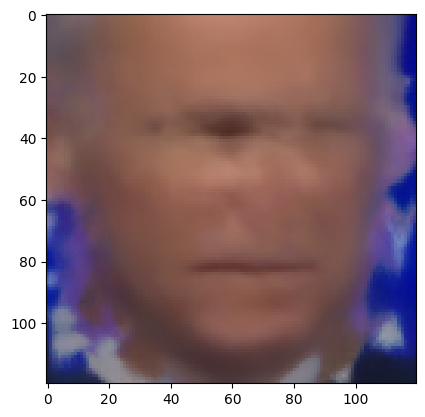

In [32]:
autoencoder_b = load_model("autoencoder_b.hdf5")
output_image = autoencoder_b.predict(np.array([X_test_b[1]]))
plt.figure()
plt.imshow(output_image[0])
plt.show()

1/1 [==============================] - 0s 21ms/step


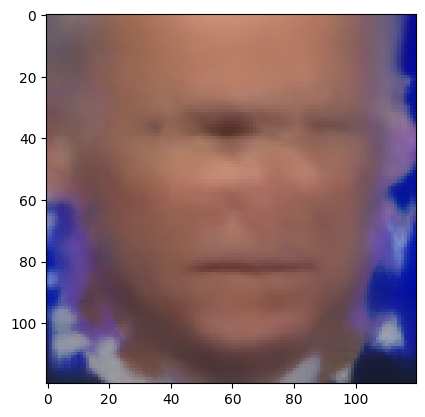

In [35]:
output_image = autoencoder_b.predict(np.array([X_test_b[20]]))
plt.figure()
plt.imshow(output_image[0])
plt.show()

In [36]:
autoencoder_a = load_model("autoencoder_a.hdf5")

In [37]:
# TO LOAD ONLY THE ENCODER A
encoder_a = keras.Model(autoencoder_a.layers[1].input, autoencoder_a.layers[1].output)
# TO LOAD ONLY THE DECODER A
decoder_a = keras.Model(autoencoder_a.layers[2].input, autoencoder_a.layers[2].output)
# TO LOAD ONLY THE ENCODER B
encoder_b = keras.Model(autoencoder_b.layers[1].input, autoencoder_b.layers[1].output)
# TO LOAD ONLY THE DECODER B
decoder_b = keras.Model(autoencoder_b.layers[2].input, autoencoder_b.layers[2].output)
 
# TO TRANSFORM SRC IMAGES
input_test = encoder_a.predict(np.array([X_test_a[30]]))
output_test = decoder_b.predict(input_test)
 
# TO TRANSFORM DST IMAGES
input_test = encoder_b.predict(np.array([X_test_b[30]]))
output_test = decoder_a.predict(input_test)

1/1 [==============================] - 0s 74ms/step


1/1 [==============================] - 0s 79ms/step


1/1 [==============================] - 0s 80ms/step


TypeError: ignored

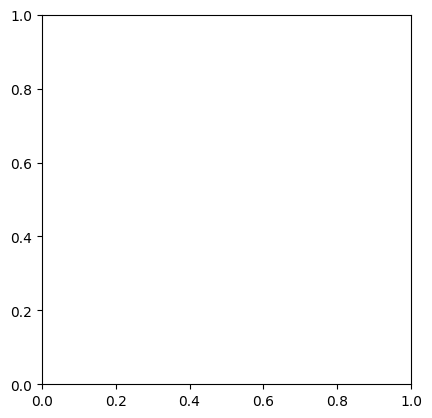

In [39]:
plt.figure()
plt.imshow(input_test)
plt.show()

In [41]:
print(output_test)

[[[[0.22456515 0.15097232 0.316409  ]
   [0.23198277 0.16009219 0.31786567]
   [0.25206253 0.1992901  0.30507794]
   ...
   [0.38328105 0.33211398 0.4338603 ]
   [0.36644414 0.3197963  0.43929905]
   [0.3569271  0.31341663 0.43926054]]

  [[0.21474268 0.15249132 0.31907952]
   [0.23929097 0.15789577 0.31128195]
   [0.24594593 0.18988162 0.30471748]
   ...
   [0.38510978 0.33828017 0.43462792]
   [0.36529997 0.32123348 0.437742  ]
   [0.35440284 0.31344134 0.43845773]]

  [[0.24434398 0.16378829 0.3071273 ]
   [0.2390898  0.19462214 0.3087595 ]
   [0.25453076 0.19728626 0.30395713]
   ...
   [0.38092113 0.3310587  0.43592635]
   [0.36213776 0.31967404 0.43692228]
   [0.34993777 0.30923894 0.43636805]]

  ...

  [[0.11561788 0.12050889 0.19542316]
   [0.11691047 0.12328339 0.20143525]
   [0.1155921  0.11526858 0.18640286]
   ...
   [0.08810715 0.11340883 0.22430584]
   [0.11302564 0.12643464 0.22028218]
   [0.08860229 0.10197705 0.20808296]]

  [[0.11724272 0.12076434 0.19615707]
   [0.1